<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Project-2/Climate_get-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering data

# Imports

In [ ]:
!pip install --upgrade gspread
!pip install netcdf4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [4]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive
/gdrive


# Data

These calculations produce the global average temperature deviations from the baseline period of 1951 to 1980.

Global temperature records start around 1880 because observations did not sufficiently cover enough of the planet prior to that time. The period of 1951-1980 was chosen largely because the U.S. National Weather Service uses a three-decade period to define “normal” or average temperature. The GISS temperature analysis effort began around 1980, so the most recent 30 years was 1951-1980. It is also a period when many of today’s adults grew up, so it is a common reference that many people can remember.

https://earthobservatory.nasa.gov/world-of-change/global-temperatures

In [5]:
HadCRUT = 'https://www.metoffice.gov.uk/hadobs/monitoring/formatted_data/gmt_HadCRUT.csv'
NOAAGlobalTemp = 'https://www.metoffice.gov.uk/hadobs/monitoring/formatted_data/gmt_NOAAGlobalTemp.csv'
GISTEMP = 'https://www.metoffice.gov.uk/hadobs/monitoring/formatted_data/gmt_GISTEMP.csv'
Cowtan_and_Way = 'https://www.metoffice.gov.uk/hadobs/monitoring/formatted_data/gmt_Cowtan%20and%20Way.csv'
Berkeley_Earth = 'https://www.metoffice.gov.uk/hadobs/monitoring/formatted_data/gmt_Berkeley%20Earth.csv'
links = [HadCRUT, NOAAGlobalTemp, GISTEMP, Cowtan_and_Way, Berkeley_Earth]

In [6]:
df_s = []
for i in range(len(links)):
  response = requests.get(links[i])
  file_object = io.StringIO(response.content.decode('utf-8'))
  df_s.append(pd.read_csv(file_object, index_col='Year'))

df_temp = pd.concat(df_s, axis=1)
df_temp.head(5)

,HadCRUT (degC),HadCRUT uncertainty,NOAAGlobalTemp (degC),NOAAGlobalTemp uncertainty,GISTEMP (degC),GISTEMP uncertainty,Cowtan and Way (degC),Cowtan and Way uncertainty,Berkeley Earth (degC),Berkeley Earth uncertainty
Year,,,,,,,,,,
1850,-0.06,0.214,NaN,NaN,NaN,NaN,-0.04,0.140,-0.14,0.325
1851,0.09,0.206,NaN,NaN,NaN,NaN,0.12,0.136,-0.03,0.320
1852,0.08,0.202,NaN,NaN,NaN,NaN,0.09,0.136,-0.02,0.320
1853,0.04,0.198,NaN,NaN,NaN,NaN,0.03,0.134,-0.05,0.294
1854,0.06,0.181,NaN,NaN,NaN,NaN,0.09,0.134,0.00,0.298


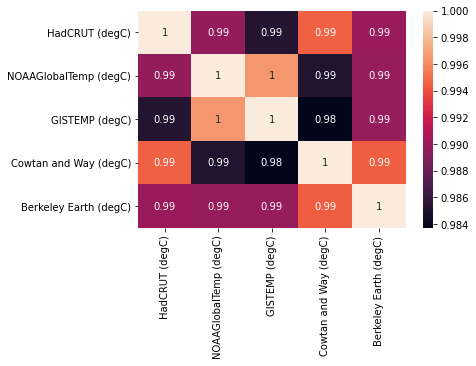

In [7]:
#validate correlation between observations
temp_cols = ['HadCRUT (degC)', 'NOAAGlobalTemp (degC)', 'GISTEMP (degC)', 
             'Cowtan and Way (degC)', 'Berkeley Earth (degC)']

sns.heatmap(df_temp[temp_cols].corr(), annot=True)

In [8]:
#average of observations
df_temp['mean_global_temp'] = df_temp[temp_cols].mean(axis=1)
df_temp_mean = pd.DataFrame(df_temp['mean_global_temp'])

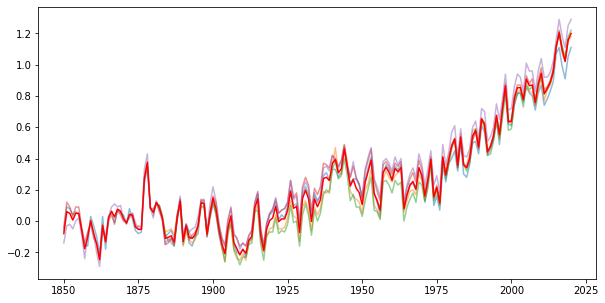

In [9]:
#plot individual against average
temp_cols = ['HadCRUT (degC)', 'NOAAGlobalTemp (degC)', 'GISTEMP (degC)','Cowtan and Way (degC)','Berkeley Earth (degC)']
df_temp[temp_cols]
plt.figure(figsize=(10,5))
plt.plot(df_temp[temp_cols], alpha=.5)
plt.plot(df_temp_mean, c='red')
plt.show()

https://spot.colorado.edu/~koppg/TSI/  
The historical reconstruction of TSI below is based on the SATIRE-T model adjusted to the most recent Community-Consensus TSI Composite values from the spacecraft era.

            Year  Solar_TSI
Year_idx                   
1610      1610.5  1360.1856


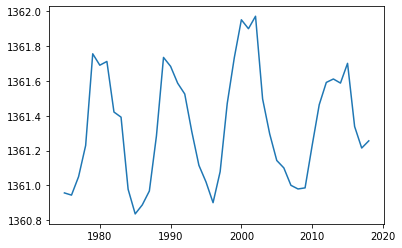

In [10]:
#solar activity as possible source of climate change
Solar = 'https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt'
cols = ['Year', 'Solar_TSI']
Solar_df = pd.read_csv(Solar, skiprows=7, names=cols, delim_whitespace='     ')
Solar_df['Year_idx'] = Solar_df['Year'].astype('int64')
Solar_df.set_index('Year_idx', inplace=True)
print(Solar_df.head(1))
Solar_df.drop('Year', axis=1, inplace=True)
plt.plot(Solar_df['Solar_TSI'].loc[1975:])
plt.show()

In [12]:
#prehistoric tamperature data
url = 'https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/friedrich2016/friedrich2016temp.txt'
history_temp = pd.read_csv(url,comment='#', delim_whitespace=True, usecols=[0,1], index_col=0, header=-0)
history_temp.head()

,tempanom-mod
age_calkaBP,
783,2.85
782,2.73
781,2.43
780,2.21
779,2.01


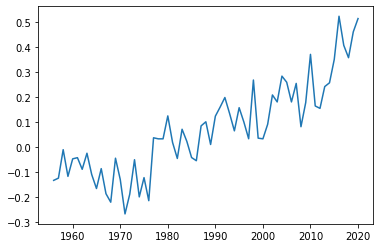

In [13]:
#https://climexp.knmi.nl/getindices.cgi?WMO=NODCData/temp100_global&STATION=global_upper_ocean_mean_temperature&TYPE=i&id=someone@somewhere
#ocean temperature data
col = 'upper_ocean_mean'
url = 'https://climexp.knmi.nl/data/itemp100_global.dat'
df_ocean_temp = pd.read_csv(url,comment='#', delim_whitespace=True, usecols=[0,1], index_col=0, header=-0)
df_ocean_temp.columns = ['upper_ocean_mean_temp']
plt.plot(df_ocean_temp)
plt.show()


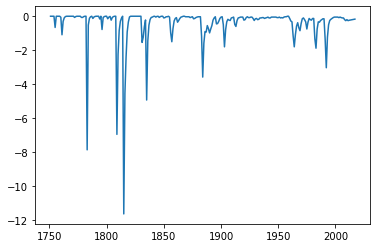

In [15]:
# https://climexp.knmi.nl/getindices.cgi?WMO=LeedsData/Volcanic_ERF&id=someone@somewhere
#volcanic activity
url = 'https://climexp.knmi.nl/data/iVolcanic_ERF.dat'
volcano_df = pd.read_csv(url,comment='#', delim_whitespace=True, usecols=[0,1], index_col=0, header=-0)
volcano_df.columns = ['Volcanic_ERF']
plt.plot(volcano_df)
plt.show()

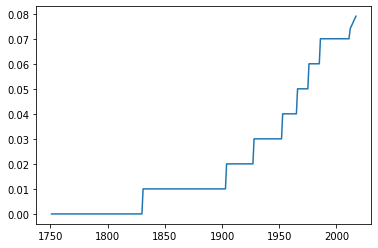

In [16]:
# https://climexp.knmi.nl/getindices.cgi?WMO=LeedsData/stratospheric_water_vapour_ERF&id=someone@somewhere
#water vapor
url = 'https://climexp.knmi.nl/data/istratospheric_water_vapour_ERF.dat'
water_vapor_df = pd.read_csv(url,comment='#', delim_whitespace=True, usecols=[0,1], index_col=0, header=-0)
water_vapor_df.columns = ['Water_vapor']
plt.plot(water_vapor_df)
plt.show()

In [ ]:
# https://public.opendatasoft.com/explore/dataset/significant-volcanic-eruption-database/table/?sort=year&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InNpZ25pZmljYW50LXZvbGNhbmljLWVydXB0aW9uLWRhdGFiYXNlIiwib3B0aW9ucyI6eyJzb3J0IjoieWVhciJ9fSwiY2hhcnRzIjpbeyJhbGlnbk1vbnRoIjp0cnVlLCJ0eXBlIjoiY29sdW1uIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoieWVhciIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGFtYWdlX21pbGxpb25zX2RvbGxhcnMiLCJtYXhwb2ludHMiOjUwLCJzb3J0IjoiIn1dLCJ0aW1lc2NhbGUiOiIiLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D

In [19]:
volcanic_url = "https://raw.githubusercontent.com/james-monahan/Code-school-notebooks/main/Project-2/significant-volcanic-eruption-database.csv"

2.151364942528736
2.1012416794674857
1.5716567460317463
8.161290322580646
8.75


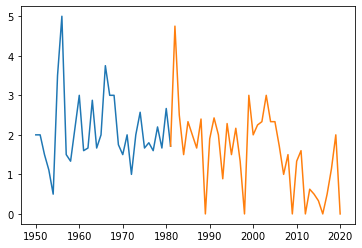

In [20]:
#additional volcanic activiy with data transformation

cols = ['Year', 'Month', 'Volcanic Explosivity Index']
volcano = pd.read_csv(volcanic_url, sep=';', usecols=cols)

#volcano.index = volcano['Year']
#volcano.groupby('Year')['Volcanic Explosivity Index'].count()
volcano['Volcanic Explosivity Index'].fillna(0, inplace=True)
volcano_activity_df = volcano.groupby('Year')['Volcanic Explosivity Index'].agg(['count', 'sum', 'mean'])

volcano_activity_df.columns = ['volcano_num_eruptions', 'volcano_sum_strength', 'volcano_mean_strength']
plt.plot(volcano_activity_df['volcano_mean_strength'].loc[1950:1981])
plt.plot(volcano_activity_df['volcano_mean_strength'].loc[1981:])
print(volcano_activity_df['volcano_mean_strength'].loc[1800:1951].mean())
print(volcano_activity_df['volcano_mean_strength'].loc[1950:1981].mean())
print(volcano_activity_df['volcano_mean_strength'].loc[1981:].mean())
print(volcano_activity_df['volcano_sum_strength'].loc[1950:1981].mean())
print(volcano_activity_df['volcano_sum_strength'].loc[1981:].mean())

Land Use Total contains all GHG emissions and removals produced in the different Land Use sub-domains, representing the three IPCC Land Use categories: cropland, forest land, and grassland, collectively called emissions/removals from the Forestry and Other Land Use (FOLU) sector.  
http://www.fao.org/faostat/en/#data/GL/visualize



In [21]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('FAO-Stat').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
Land_use_df = pd.DataFrame.from_records(rows,columns=['Year','Unit','Land_Use_Value'])
Land_use_df.drop(index=0, inplace=True)
Land_use_df.set_index('Year', inplace=True)
Land_use_df.index = Land_use_df.index.astype('int64')
Land_use_df.drop('Unit', axis=1, inplace=True)
Land_use_df['Land_Use_Value'] = Land_use_df['Land_Use_Value'].astype('float64')

      Land_Use_Value
Year                
1990     4122048.034
1991     4122053.386
1992     4122026.474
1993     4122056.446
1994     4122065.168


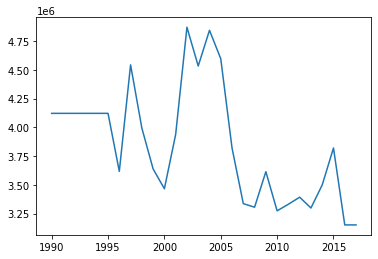

In [22]:
print(Land_use_df.head())
plt.plot(Land_use_df['Land_Use_Value'])
plt.show()

In [23]:
# https://www.gapminder.org/data/documentation/gd003/
filename = 'Gapminder_population'
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open(filename).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
population_df = pd.DataFrame.from_records(rows, columns=['date','population'])
population_df.set_index('date', inplace=True)
population_df.index = population_df.index.astype('int64')
population_df['population'] = population_df['population'].astype('int64')
population_df.head()

,population
date,
1800,985083735
1801,988518009
1802,991993182
1803,995509576
1804,999067550


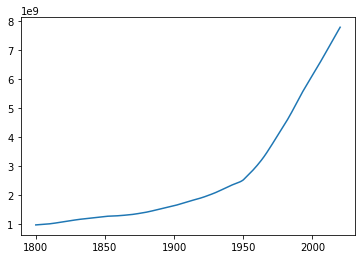

In [24]:
plt.plot(population_df)
plt.show()

Primary production of energy is any extraction of energy products in a useable form from natural sources. This occurs either when natural sources are exploited (for example, in coal mines, crude oil fields, hydro power plants) or in the fabrication of biofuels.

Transforming energy from one form into another, such as electricity or heat generation in thermal power plants (where primary energy sources are burned), or coke production in coke ovens, is not primary production

In [25]:
# https://www.theshiftdataportal.org/
filename = 'Primary Energy Produciton'
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open(filename).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
energy_df = pd.DataFrame.from_records(rows, columns=['date','energy_production-mtoe'])
energy_df['date'] = energy_df['date'].str[:4]
energy_df.set_index('date', inplace=True)
energy_df.index = energy_df.index.astype('int64')
energy_df['energy_production-mtoe'] = energy_df['energy_production-mtoe'].astype('float64')

      energy_production-mtoe
date                        
1900              487.303701
1901              498.787761
1902              512.861382
1903              559.129905
1904              565.849518


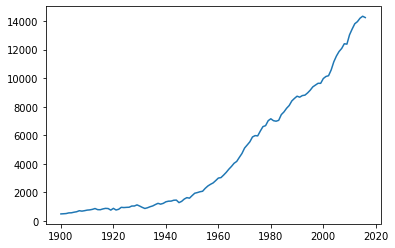

In [26]:
print(energy_df.head())
plt.plot(energy_df['energy_production-mtoe'])
plt.show()

Natural disasters from 1900 to 2019 - EMDAT (2020)


In [27]:
url = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Natural%20disasters%20from%201900%20to%202019%20-%20EMDAT%20(2020)/Natural%20disasters%20from%201900%20to%202019%20-%20EMDAT%20(2020).csv'
df_disaster = pd.read_csv(url)
df_disaster = df_disaster[df_disaster['Entity']=='All natural disasters'].iloc[:,[1,2]]
df_disaster.columns = ['Year', 'Number_of_disasters']
df_disaster.set_index('Year', inplace=True)
df_disaster.head()

,Number_of_disasters
Year,
1900,5
1901,2
1902,9
1903,8
1904,2


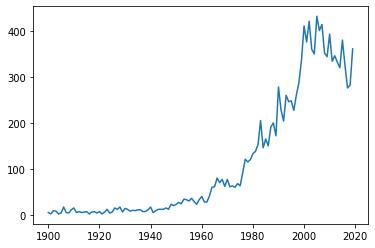

In [28]:
plt.plot(df_disaster['Number_of_disasters'])
plt.show()

https://www.eea.europa.eu/data-and-maps/indicators/ocean-acidification-3/assessment

https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=GLOBAL_OMI_SL_area_averaged_anomalies  

https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=GLOBAL_OMI_HEALTH_carbon_ph_area_averaged  

https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=GLOBAL_OMI_CLIMVAR_NPGO_sla_eof_mode_projection



In [38]:
!pwd

/gdrive


In [39]:
#ocean data
import xarray as xr

#imported into colabs
omi_climvar = xr.open_dataset('/content/global_omi_climvar_npgo_sla_eof_mode_projection_19500115_P20200401.nc')
omi_carbon = xr.open_dataset('/content/global_omi_health_carbon_ph_area_averaged_1985_P20191231.nc')
omi_anom = xr.open_dataset('/content/global_omi_sl_area_averaged_anomalies_19930101_P20200403.nc')


df_climvar = omi_climvar.to_dataframe()
df_omi_carbon = omi_carbon.to_dataframe()
df_omi_carbon.index = df_omi_carbon.index.astype('str').str[:4]
df_omi_carbon.index = df_omi_carbon.index.astype('int64')
#df_omi_carbon['ph'].astype('str').str.split(' ', expand=True)
#df_omi_carbon.columns = ['time', 'ph', 'uncertainty']
df_omi_anom = omi_anom.to_dataframe()
print(df_climvar.head(3))
print(df_omi_carbon.head(3))
print(df_omi_anom.head(3))


                npgo
time                
1950-01-15 -2.188395
1950-02-15 -1.445831
1950-03-15 -0.965036
            ph  ph_uncertainty
time                          
1985  8.109290        0.000817
1986  8.108254        0.000789
1987  8.106547        0.000708
                 sla  sla_filtered  sla_tpacorr  sla_filtered_tpacorr
time                                                                 
1993-01-01 -0.002619     -0.002863     0.003532              0.003288
1993-01-02 -0.002637     -0.002844     0.003514              0.003307
1993-01-03 -0.002535     -0.002825     0.003616              0.003326


In [40]:
df_climvar_mean = df_climvar.groupby(df_climvar.index.year).mean()
df_omi_anom_mean = df_omi_anom.groupby(df_omi_anom.index.year).mean()

In [41]:
df_omi_carbon.drop('ph_uncertainty', axis=1, inplace=True)
df_omi_carbon.rename(columns={"ph": "Ocean_ph"}, inplace=True)
df_omi_anom_mean.drop(['sla_filtered', "sla_tpacorr", "sla_filtered_tpacorr"], axis=1, inplace=True)
df_omi_anom_mean.rename(columns={"sla": "Ocean_sla_mean"}, inplace=True)
df_climvar_mean.rename(columns={"npgo": "Ocean_npgo_mean"}, inplace=True)

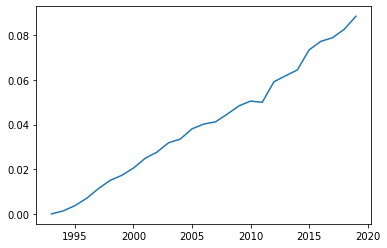

In [43]:
# plt.plot(df_climvar_mean ['Ocean_npgo_mean'])
# plt.plot(df_omi_carbon['Ocean_ph'])
plt.plot(df_omi_anom_mean['Ocean_sla_mean'])
plt.show()

In [44]:
multi_df = []
for x in dir():
  if 'df' in x:
    multi_df.append(x)
print(multi_df)
multi_df = [Land_use_df,
 Solar_df,
 df_climvar_mean,
 df_disaster,
 df_omi_anom_mean,
 df_omi_carbon,
 df_temp_mean,
 energy_df,
 population_df, df_ocean_temp, volcano_df, water_vapor_df, volcano_activity_df
]

['Land_use_df', 'Solar_df', 'df_climvar', 'df_climvar_mean', 'df_disaster', 'df_ocean_temp', 'df_omi_anom', 'df_omi_anom_mean', 'df_omi_carbon', 'df_s', 'df_temp', 'df_temp_mean', 'energy_df', 'multi_df', 'population_df', 'volcano_activity_df', 'volcano_df', 'water_vapor_df']


In [45]:
df_all_merge = pd.concat(multi_df, axis=1)
df_all_merge.tail(5)

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
2016,3151070.794,1361.3384,-0.130798,325.0,0.077099,8.059615,1.204,14246.77631,7.464022e+09,0.524395,-0.183,0.078,5.0,0.0,0.000000
2017,3151070.794,1361.2147,-0.824543,276.0,0.078719,8.057924,1.096,NaN,7.547859e+09,0.407761,-0.170,0.079,8.0,4.0,0.500000
2018,NaN,1361.2560,-1.846386,282.0,0.082473,8.056726,1.022,NaN,7.631091e+09,0.358287,NaN,NaN,14.0,16.0,1.142857
2019,NaN,NaN,-2.279575,361.0,0.088309,NaN,1.158,NaN,7.713468e+09,0.461826,NaN,NaN,7.0,14.0,2.000000
2020,NaN,NaN,-1.968411,NaN,NaN,NaN,1.200,NaN,7.794799e+09,0.515080,NaN,NaN,2.0,0.0,0.000000


In [47]:
df_all_merge.to_csv('/all_data.csv')

In [48]:
df_all_merge_vals = df_all_merge.dropna()
df_all_merge_vals.tail()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
2012,3392405.541,1361.5920,1.358926,346.0,0.059085,8.067349,0.848,13812.57522,7.125828e+09,0.155250,-0.237,0.074,3.0,0.0,0.000000
2013,3298233.975,1361.6117,0.374610,332.0,0.061780,8.064808,0.886,13959.61532,7.210582e+09,0.242630,-0.224,0.075,8.0,5.0,0.625000
2014,3499189.188,1361.5882,-0.229226,320.0,0.064366,8.063553,0.954,14200.60196,7.295291e+09,0.257744,-0.211,0.076,6.0,3.0,0.500000
2015,3820452.436,1361.7017,-1.339616,380.0,0.073298,8.062140,1.114,14338.66688,7.379797e+09,0.351189,-0.196,0.077,6.0,2.0,0.333333
2016,3151070.794,1361.3384,-0.130798,325.0,0.077099,8.059615,1.204,14246.77631,7.464022e+09,0.524395,-0.183,0.078,5.0,0.0,0.000000


In [49]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_all_merge.iloc[325:])

#Facebook prophet  
running prophet out of curiosity, not an analysis

In [60]:
from fbprophet import Prophet

In [61]:
df_all_merge_vals.head()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,y,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength,ds
1993,4122056.446,1361.3081,-1.901993,260.0,0.000139,8.099635,0.478,8810.265265,5.581598e+09,0.134191,-1.23,0.07,9.0,8.0,0.888889,1993-01-01
1994,4122065.168,1361.1154,-1.211599,246.0,0.001488,8.097717,0.544,8963.500717,5.663150e+09,0.065215,-0.50,0.07,7.0,16.0,2.285714,1994-01-01
1995,4122073.860,1361.0200,-1.039209,248.0,0.003823,8.095885,0.674,9154.164367,5.744213e+09,0.158000,-0.25,0.07,6.0,9.0,1.500000,1995-01-01
1996,3617122.744,1360.9005,-0.972837,227.0,0.007114,8.094135,0.552,9389.086986,5.824892e+09,0.100212,-0.18,0.07,6.0,13.0,2.166667,1996-01-01
1997,4544312.867,1361.0787,-0.657691,261.0,0.011384,8.093833,0.716,9515.014818,5.905046e+09,0.033529,-0.13,0.07,9.0,12.0,1.333333,1997-01-01


In [ ]:
df_all_merge_vals['ds'] = df_all_merge_vals.index
df_all_merge_vals.rename(columns={'mean_global_temp':'y'}, inplace=True)
df_all_merge_vals.ds = pd.to_datetime(df_all_merge_vals.ds, format='%Y')

In [63]:
df_all_merge_vals.tail()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,y,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength,ds
2012,3392405.541,1361.5920,1.358926,346.0,0.059085,8.067349,0.848,13812.57522,7.125828e+09,0.155250,-0.237,0.074,3.0,0.0,0.000000,2012-01-01
2013,3298233.975,1361.6117,0.374610,332.0,0.061780,8.064808,0.886,13959.61532,7.210582e+09,0.242630,-0.224,0.075,8.0,5.0,0.625000,2013-01-01
2014,3499189.188,1361.5882,-0.229226,320.0,0.064366,8.063553,0.954,14200.60196,7.295291e+09,0.257744,-0.211,0.076,6.0,3.0,0.500000,2014-01-01
2015,3820452.436,1361.7017,-1.339616,380.0,0.073298,8.062140,1.114,14338.66688,7.379797e+09,0.351189,-0.196,0.077,6.0,2.0,0.333333,2015-01-01
2016,3151070.794,1361.3384,-0.130798,325.0,0.077099,8.059615,1.204,14246.77631,7.464022e+09,0.524395,-0.183,0.078,5.0,0.0,0.000000,2016-01-01


In [59]:
#m = Prophet()
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(df_all_merge_vals)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [64]:
future = m.make_future_dataframe(periods=144, freq='MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,2027-09-01,1.265578,1.155225,1.389529
164,2027-10-01,1.272303,1.169003,1.388051
165,2027-11-01,1.288305,1.182817,1.399484
166,2027-12-01,1.332876,1.225518,1.440576
167,2028-01-01,1.286019,1.180331,1.393786


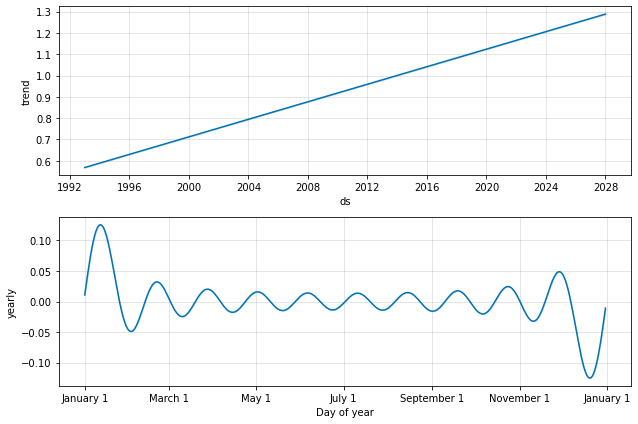

In [65]:
fig2 = m.plot_components(forecast)

In [66]:
forecast.groupby(forecast.ds.astype('str').str[:4])['yhat'].mean()

ds
1993    0.579048
1994    0.595292
1995    0.611528
1996    0.627762
1997    0.661330
1998    0.677574
1999    0.693810
2000    0.710044
2001    0.743612
2002    0.759856
2003    0.776093
2004    0.792327
2005    0.825894
2006    0.842138
2007    0.858375
2008    0.874609
2009    0.908177
2010    0.924421
2011    0.940657
2012    0.956891
2013    0.990459
2014    1.006703
2015    1.022939
2016    1.050525
2017    1.072269
2018    1.092768
2019    1.113265
2020    1.132808
2021    1.154551
2022    1.175050
2023    1.195547
2024    1.215090
2025    1.236833
2026    1.257332
2027    1.277829
2028    1.286019
Name: yhat, dtype: float64

In [67]:
df_temp_mean.tail(10)

,mean_global_temp
Year,
2011,0.816
2012,0.848
2013,0.886
2014,0.954
2015,1.114
2016,1.204
2017,1.096
2018,1.022
2019,1.158
